In [1]:
import numpy as np
import pandas as pd
from scipy.linalg import eig, lstsq, solve, eigh
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1 PageRank Algorithm

In [2]:
# The following matrix M representing a small web network is given.
M = np.array([[0, 0, 1/2, 0],
              [1/3, 0, 0, 1/2],
              [1/3, 1/2, 0 ,1/2],
              [1/3, 1/2, 1/2, 0]])

# 1. Compute the dominant eigenvetors of M
eigenvalues, eigenvectors = eig(M)

# Find the index of the dominant eigenvalue
dominant_index = np.argmax(np.abs(eigenvalues))

# Get the dominant eigenvector
dominant_eigenvector = eigenvectors[:, dominant_index]
dominant_eigenvector = np.real(dominant_eigenvector)
print(f"Dominant Eigenvector: {dominant_eigenvector}\n")

# 2. Find a rank vector
# Initialize with ones
v = np.ones(4)
v_new = M @ v

# Iterate until convergence
while np.linalg.norm(v_new - v) > 1e-10:
    v = v_new
    v_new = M @ v
print(f"Rank Vector by Iteration: {v}\n")

# 3. Normalize the eigenvector
dominant_eigenvector = dominant_eigenvector/sum(abs(dominant_eigenvector))
print(f"Normlized eigenvector: {dominant_eigenvector}\n")
print("The entries of the eigenvector represent the long-run probability of a user being on each page.")

# 4.
ranked_highest_index = np.argwhere(dominant_eigenvector == np.amax(np.abs(dominant_eigenvector)))
ranked_highest_index = set(ranked_highest_index.flatten())
print(f"Based on the final PageRank scores, page {ranked_highest_index} is ranked the highest. Pages start from 0.")

Dominant Eigenvector: [0.30460385 0.40613847 0.6092077  0.6092077 ]

Rank Vector by Iteration: [0.63157895 0.84210526 1.26315789 1.26315789]

Normlized eigenvector: [0.15789474 0.21052632 0.31578947 0.31578947]

The entries of the eigenvector represent the long-run probability of a user being on each page.
Based on the final PageRank scores, page {2, 3} is ranked the highest. Pages start from 0.


# 2 Dimensionality Reduction via PCA

Covariance matrix:
 [[1.02608749 0.11769063]
 [0.11769063 1.08134929]]
Eigenvectors:
 [[-0.78376051  0.62106317]
 [ 0.62106317  0.78376051]]
The first principle component:
 [0.62106317 0.78376051]
The second principle component:
 [-0.78376051  0.62106317]
Projected 1D data:
 [ 2.5715271  -0.80779742 -0.38789785  2.1515111   0.2404237   0.91638223
  0.26588671 -0.67982795  1.44302059  1.41537663  1.55317912  1.61331774
 -0.20234218  1.57260135  0.06561665  0.83616647  1.67033617 -0.24890703
  0.67572598  0.19234176 -1.29054049 -0.45572848  0.77061679  0.57863752
  0.86528615 -1.02053061 -0.31263724  1.33312688  1.4788708   1.23191712
 -0.50719767  0.65750503 -1.07988634 -1.20525221 -0.71442647  0.62726429
  1.21599735  0.58349751  0.06982    -1.04444755 -1.82000644 -0.53754298
 -0.92906948  1.70926732  1.55128856  0.46817391 -1.49349907  1.35834388
 -2.03368878 -0.49389694 -0.60962638  1.58314126 -0.90095168 -1.38097706
 -0.09466614 -0.25398693  0.92432414 -0.65855351 -1.29329471 -0.568

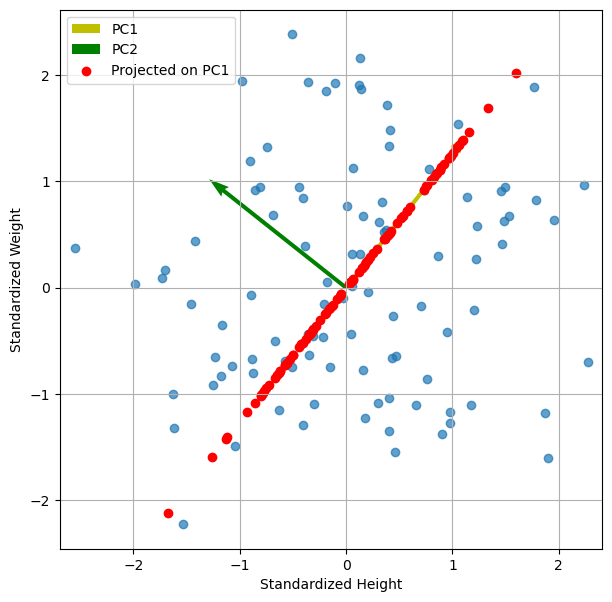

In [3]:
# Read the data
data = pd.read_csv('./data.csv')
data = data.values

# 1. Covariance matrix of the data
cov = np.cov(data, rowvar=False)
print(f"Covariance matrix:\n {cov}")

# 2. Eigenvalue decomposition on the Covariance matrix
eigenvalues, eigenvectors = eigh(cov)
print(f"Eigenvectors:\n {eigenvectors}")
# 3. Identify the principal components
# Sort the eigenvalues and eigenvectors in descending order
sort_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sort_indices]
eigenvectors_sorted = eigenvectors[:, sort_indices]

# The principal components are the sorted eigenvectors
pc1 = eigenvectors_sorted[:, 0]
pc2 = eigenvectors_sorted[:, 1]
print(f"The first principle component:\n {pc1}")
print(f"The second principle component:\n {pc2}")

# 4. Reduce the dataset to 1D by projecting it onto the pc1
projection = data @ pc1
print(f"Projected 1D data:\n {projection}")

# Plot the original data and the 1D projection
plt.figure(figsize=(7, 7))

# Plot the original 2D Data
plt.scatter(data[:, 0], data[:, 1], alpha=0.7)
plt.xlabel("Standardized Height")
plt.ylabel("Standardized Weight")
plt.grid(True)
plt.axis('equal')

# Plot the principal components
origin = [0, 0]
plt.quiver(*origin, *pc1 * np.sqrt(eigenvalues_sorted[0]),
           color='y', scale=3, label='PC1')
plt.quiver(*origin, *pc2 * np.sqrt(eigenvalues_sorted[1]),
           color='g', scale=3, label='PC2')

# Plot the projection of data onto pc1
projected_2d_coords = np.outer(projection, pc1)
plt.scatter(projected_2d_coords[:, 0], projected_2d_coords[:, 1],color='r', label='Projected on PC1')
plt.legend()
plt.show()

# 3 Linear Regression via Least Squares

In [4]:
# 1. Set up the system as a least-squaures problem
# House features
X = np.array([[2100, 3, 20],
              [2500, 4, 15],
              [1800, 2, 30],
              [2200, 3, 25]])
# House prices
y = np.array([[460], [540],[330],[400]])

# 2. Solve for beta using scipy.linalg.lstsq
beta, _, _, _ = lstsq(X, y)

# 3. Prediction for [2400, 3, 20]
pred = [2400, 3, 20] @ beta

# 4. Comparison to an alternative method 
# We will have an error, since the solve method is for a square matrix X.
# ValueError: Input a needs to be a square matrix.
# beta2 = solve(X,y)

# 4 Gradient Descent for Minimizing Loss Function

Total iterations: 3


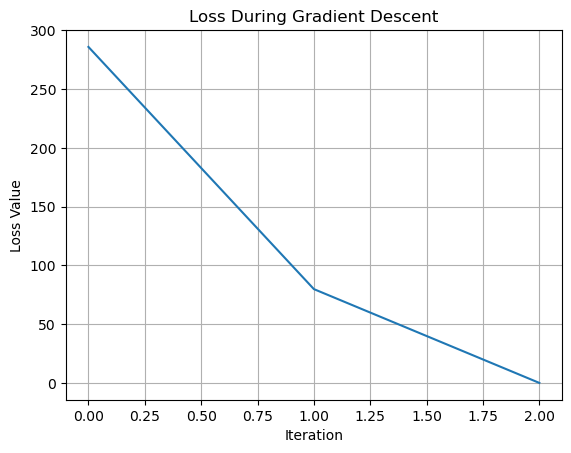

In [5]:
# A is a fixed matrix
A = np.random.rand(100, 50)

# X is our initial guess
X = np.random.rand(100, 50)

# Define the loss function
loss = lambda X: 0.5 * np.sum((X - A) ** 2)
# Gradient of the loss function is:
gradient = lambda X: X - A

# For using minimize method, we need to flatten X and A
X = X.flatten()
A = A.flatten()

# For plotting, we store the history of loss values
loss_history = []

def track_loss(X_current):
    current_loss = loss(X_current)
    loss_history.append(current_loss)
    
# Implement Gradient Descent
result = minimize(loss, X, jac = gradient, tol = 1e-6, callback=track_loss, options = {'maxiter':1000})

X_final = result.x.reshape(100,50)

# --- 7. Visualize Results (Task 4.6) ---
print(f"Total iterations: {len(loss_history)}")
plt.figure()
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss Value")
plt.title("Loss During Gradient Descent")
plt.grid(True)
plt.show()